Iteration 0: loss=29.76341, w0=0.114, w1=1.251
Iteration 1000: loss=9.34514, w0=-4.095, w1=1.216
Iteration 2000: loss=9.34136, w0=-4.239, w1=1.231
Iteration 3000: loss=9.34135, w0=-4.244, w1=1.231
Iteration 4000: loss=9.34135, w0=-4.245, w1=1.231
Iteration 5000: loss=9.34135, w0=-4.245, w1=1.231
Iteration 6000: loss=9.34135, w0=-4.245, w1=1.231
Iteration 7000: loss=9.34135, w0=-4.245, w1=1.231
Iteration 8000: loss=9.34135, w0=-4.245, w1=1.231
Iteration 9000: loss=9.34135, w0=-4.245, w1=1.231
Iteration 10000: loss=9.34135, w0=-4.245, w1=1.231
Iteration 11000: loss=9.34135, w0=-4.245, w1=1.231
Iteration 12000: loss=9.34135, w0=-4.245, w1=1.231
Iteration 13000: loss=9.34135, w0=-4.245, w1=1.231
Iteration 14000: loss=9.34135, w0=-4.245, w1=1.231
Iteration 15000: loss=9.34135, w0=-4.245, w1=1.231
Iteration 16000: loss=9.34135, w0=-4.245, w1=1.231
Iteration 17000: loss=9.34135, w0=-4.245, w1=1.231
Iteration 18000: loss=9.34135, w0=-4.245, w1=1.231
Iteration 19000: loss=9.34135, w0=-4.245, w1

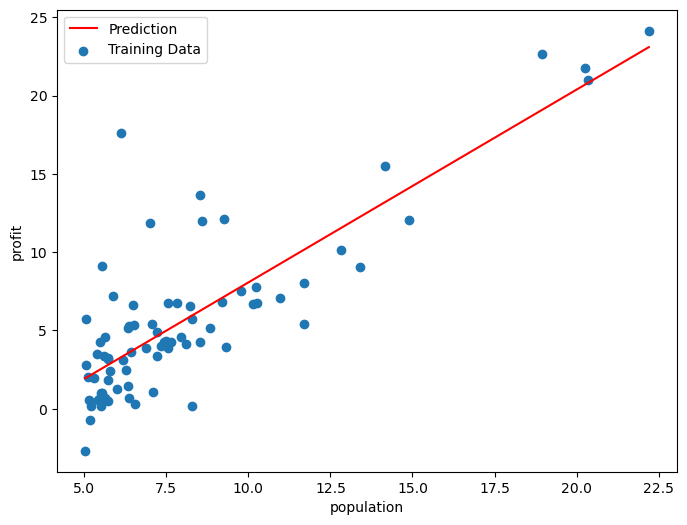

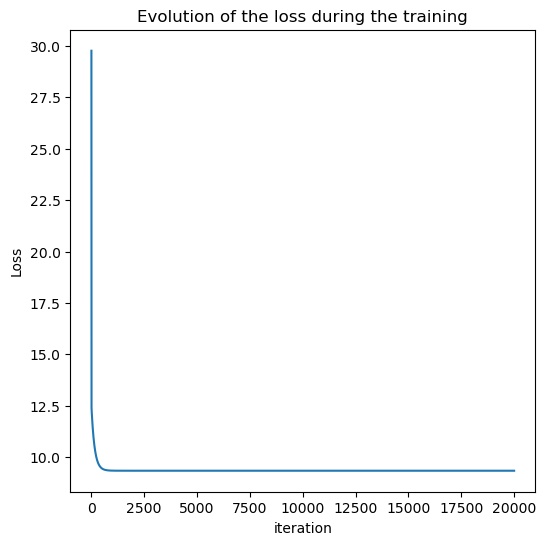

[-4.24467437  1.23149916]
Train loss: 9.34135
Test loss: 7.57472
A new restaurant in a city of 10'000 inhabitants has an expected profit of 8070.32 $.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Any, Callable
import helpers

restaurant_df = pd.read_csv('data/restaurant_data.csv')

#print(f"There are {restaurant_df.shape[0]} rows and {restaurant_df.shape[1]} columns.")
restaurant_df.head(5)
#restaurant_df.plot(kind='scatter', x='population', y='profit')
X_train, y_train, X_test, y_test, feature_names = helpers.preprocess_data(restaurant_df, label="profit", train_size=0.8, seed=42)

def add_constant(X: np.ndarray) -> np.ndarray:
    X_with_offset = np.insert(X, 0, 1, axis=1)
    return X_with_offset

X_train = add_constant(X_train)
X_test = add_constant(X_test)

#print(np.matmul(add_constant(X_test).T,add_constant(X_test)))
#print(f"Features: {feature_names}")
#print('Training set features:')
#print(f'X_train: \n {X_train[:10]}')
#print('\nTraining set labels:')
#print(f'y_train: \n {y_train[:10]}')
#print('Training set shape:')
#print(f'X: {X_train.shape}, y: {y_train.shape}')
#print('\nTest set shape:')
#print(f'X: {X_test.shape}, y: {y_test.shape}')

def mse_loss(X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
    loss=(1/len(y))*(np.matmul((np.matmul(X,w)-y).T,np.matmul(X,w)-y))
    return loss

zero_weights = np.zeros(X_train.shape[1])
#print(zero_weights)
train_loss = mse_loss(X_train, y_train, zero_weights)
test_loss = mse_loss(X_test, y_test, zero_weights)
#print(f"Train loss: {train_loss:.5f}")
#print(f"Test loss: {test_loss:.5f}")
#helpers.plot_linear_regression_2d(X=X_train, y=y_train, w=zero_weights)

def mse_gradient(X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
    grad = (2/len(y))*(np.matmul(X.T,np.matmul(X,w)-y))
    return grad

def gradient_descent(X: np.ndarray, y: np.ndarray, w: np.ndarray, alpha: float, max_iters: int) -> (np.ndarray, np.ndarray):
    losses = np.zeros(max_iters)
    for n_iter in range(max_iters):
        w = w-alpha*mse_gradient(X,y,w)
        # Compute the loss with the updated w
        loss = (1/len(y))*(np.matmul((np.matmul(X,w)-y).T,np.matmul(X,w)-y))
        losses[n_iter] = loss
        if n_iter % (max_iters / 20) == 0:
            if w.shape[0] == 2: 
                print(f"Iteration {n_iter}: loss={loss:.5f}, w0={w[0]:.3f}, w1={w[1]:.3f}")
            else:
                print(f"Iteration {n_iter}: loss={loss:.5f}")
    return w, losses

alpha = 0.01
iters = 20000
w = np.zeros((X_train.shape[1], ))
w, loss = gradient_descent(X_train, y_train, w, alpha, iters)

train_loss = mse_loss(X_train, y_train, w)
test_loss = mse_loss(X_test, y_test, w)
#print(f"Train loss: {train_loss:.5f}")
#print(f"Test loss: {test_loss:.5f}")

helpers.plot_linear_regression_2d(X=X_train, y=y_train, w=w, feature_name="population", label_name="profit")
helpers.plot_loss(loss)

def least_squares(X: np.ndarray, y: np.ndarray) -> np.ndarray:
    w = np.linalg.solve(np.matmul(X.T,X),np.matmul(X.T,y))
    return w

ls_w = least_squares(X_train, y_train)
print(ls_w)
train_loss = mse_loss(X_train, y_train, ls_w)
test_loss = mse_loss(X_test, y_test, ls_w)
print(f"Train loss: {train_loss:.5f}")
print(f"Test loss: {test_loss:.5f}")

def predict(X, w):
    y_hat = np.matmul(w,X)
    return y_hat

expected_profit = predict([1, 10], w)
print(f"A new restaurant in a city of 10'000 inhabitants has an expected profit of {expected_profit*1000:.2f} $.")